## imports

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, normaltest

## make input raedy 

In [35]:
def create_desire_dfs(path):
    df = pd.read_csv(path)
    df = df.loc[df.province == "CharmahalBakhtiari"]
    df_rosta = df.loc[df.state == "R"]
    df_rosta = pd.concat([df_rosta.total_income, df_rosta.year], axis=1)
    df_shahr = df.loc[df.state == "U"]
    df_shahr = pd.concat([df_shahr.total_income, df_shahr.year], axis=1)
    return df_shahr, df_rosta

## draw histograms

In [36]:
def draw_hist(df_shahr, df_rosta):
    years = df_shahr.year.unique()
    for year in years:
        print(year)
        figure, axis = plt.subplots(1, 2)
        figure.set_figheight(30)
        figure.set_figheight(3)
        tmp_df_shahr = df_shahr.loc[df_shahr.year == year].total_income
        tmp_df_rosta = df_rosta.loc[df_rosta.year == year].total_income
        print(f'std rosta={tmp_df_rosta.std()}')
        print(f'std shahr={tmp_df_shahr.std()}')
        axis[0].hist(tmp_df_shahr)
        axis[0].set_title("shahr")
        axis[1].hist(tmp_df_rosta)
        axis[1].set_title("rosta")
        plt.show()

98
std rosta=188395473.1001925
std shahr=276422961.7237824


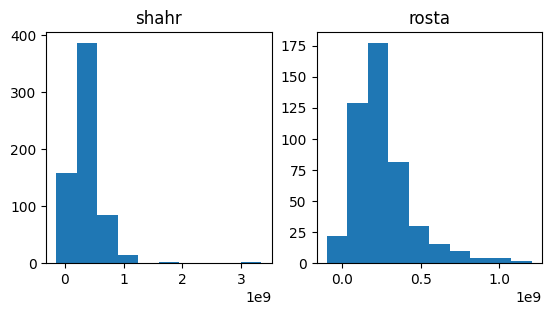

99
std rosta=279653098.40433097
std shahr=336419200.80718935


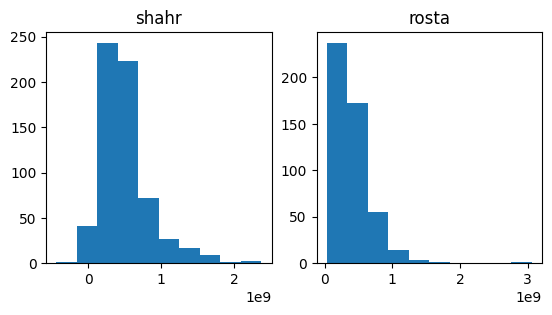

1400
std rosta=401594285.0337864
std shahr=564700316.4152838


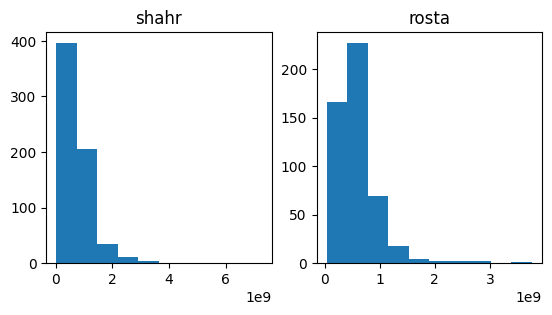

1401
std rosta=663547038.8171264
std shahr=764907329.2084721


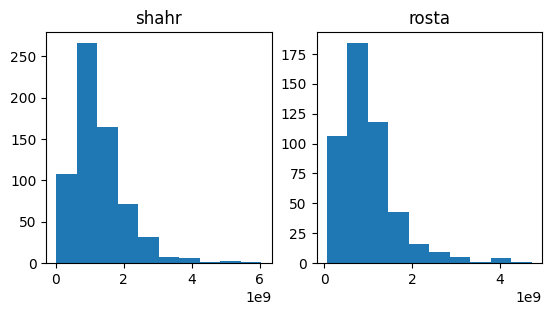

In [37]:
df_shahr, df_rosta = create_desire_dfs(path="./cleaned_datasets/df.csv")
draw_hist(df_shahr, df_rosta)

inference that variance are not equal

Check if our distrubision is normal and choice between t-test or u-test

In [38]:
def check_normality():    
    years = df_shahr.year.unique()
    for year in years:
        print(year)
        tmp_df_shahr = df_shahr.loc[df_shahr.year == year].total_income
        tmp_df_rosta = df_rosta.loc[df_rosta.year == year].total_income
        _, p_value_shahr = normaltest(tmp_df_shahr)
        _, p_value_rosta = normaltest(tmp_df_rosta)
        print("p-values:", p_value_shahr, p_value_rosta)

check_normality()

98
p-values: 1.4263680478810426e-137 2.528503748782319e-37
99
p-values: 4.69812934538038e-50 1.780546638227256e-73
1400
p-values: 1.3116100854365258e-124 1.7473922626462612e-70
1401
p-values: 3.0369070053333044e-52 3.490577473000357e-45


so our distrubision isn't normal

## hypothesis testing

for each year check if h0 is reject or not

h0 : shahr income = rosta income

using <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#r31b0b1c0fec3-4">scipy.stats.mannwhitneyu</a>

In [39]:
alpha = 0.05
def hypothesistesting():
    df_shahr, df_rosta = create_desire_dfs(path="./cleaned_datasets/df.csv")
    for year in df_shahr.year.unique():
        shahr_year_income = np.array(df_shahr.loc[df_shahr.year == year].total_income)
        rosta_year_income = np.array(df_rosta.loc[df_rosta.year == year].total_income)
        U1, p = mannwhitneyu(shahr_year_income, rosta_year_income)
        print(p)
        if p < alpha:
            print(f"h0: shahr income = rosta income in year={year} h0 rejected")
        else:
           print(f"h0: shahr income = rosta income in year={year} h0 not rejected")

In [40]:
hypothesistesting()

2.651191958137599e-17
h0: shahr income = rosta income in year=98 h0 rejected
6.934803787250026e-11
h0: shahr income = rosta income in year=99 h0 rejected
1.8454659027508173e-12
h0: shahr income = rosta income in year=1400 h0 rejected
1.3230455008288731e-11
h0: shahr income = rosta income in year=1401 h0 rejected


پس درآمد روستانشین ها با شهرنشین ها برابر نمی‌باشد